In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [449]:
def plot_series(time, series, format="-", start=0, end=None, xlabel=None, ylabel=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(12, 6))
    
    if isinstance(series, tuple) or isinstance(series, list):
        for single_series in series:
            plt.plot(time[start:end], single_series[start:end], format)
    else:
        plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()


In [450]:
def trend(time, slope=0, init=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = init + slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

In [451]:
# Generate synthetic dataset
def generate_synthetic_data(
    start_date='2010-01-01', 
    end_date='2013-12-10', 
    init_sales=100_000,
    init_spend=75_000,
    slope_sales=100, 
    slope_spend=85, 
    period_sales=30, 
    period_spend=92,
    amplitude_sales=40_000, 
    amplitude_spend=20_000, 
    noise_level_sales=10_000, 
    noise_level_spend=7_500, 
    seed=42,
    ):
    """
    Generates a synthetic dataset for sales and spending over a given period.

    Args:
        start_date (str): The start date of the dataset in 'YYYY-MM-DD' format. Default is '2010-01-01'.
        end_date (str): The end date of the dataset in 'YYYY-MM-DD' format. Default is '2013-12-31'.
        init_sales (init): Total sales at day 1. Default is 100_000.
        init_spend (init): Total spend at day 1. Default is 85_000.
        slope_sales (float): The slope for the trend component of the sales data. Default is 100.
        slope_spend (float): The slope for the trend component of the spending data. Default is 75.
        period_sales (int): The period of the seasonal component for the sales data. Default is 30 (one month).
        period_spend (int): The period of the seasonal component for the spending data. Default is 92 (one month).
        amplitude_sales (float): The amplitude of the seasonal component for the sales data. Default is 70_000.
        amplitude_spend (float): The amplitude of the seasonal component for the spending data. Default is 40_000.
        noise_level_sales (float): The noise level added to the sales data. Default is 10_000.
        noise_level_spend (float): The noise level added to the spending data. Default is 7_500.
        seed (int): The seed for the random number generator for reproducibility. Default is 42.

    Returns:
        pd.DataFrame: A DataFrame containing the synthetic dataset with columns 'Date', 'Total Sales', and 'Total Spend'.
    """
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    time = np.arange(len(dates))

    # Generate synthetic sales data
    sales = trend(time, slope_sales, init_sales) + seasonality(time, period_sales, amplitude_sales) + noise(time, noise_level_sales, seed)
    
    # Generate synthetic spending data
    spend = trend(time, slope_spend, init_spend) + seasonality(time, period_spend, amplitude_spend) + noise(time, noise_level_spend, seed+1)
    
    # Create DataFrame
    data = pd.DataFrame({
        'Date': dates,
        'Total Sales': sales,
        'Total Spend': spend
    })
    
    return data

In [452]:
# Generate data from January 1, 2010 to December 31, 2013
synthetic_data = generate_synthetic_data()

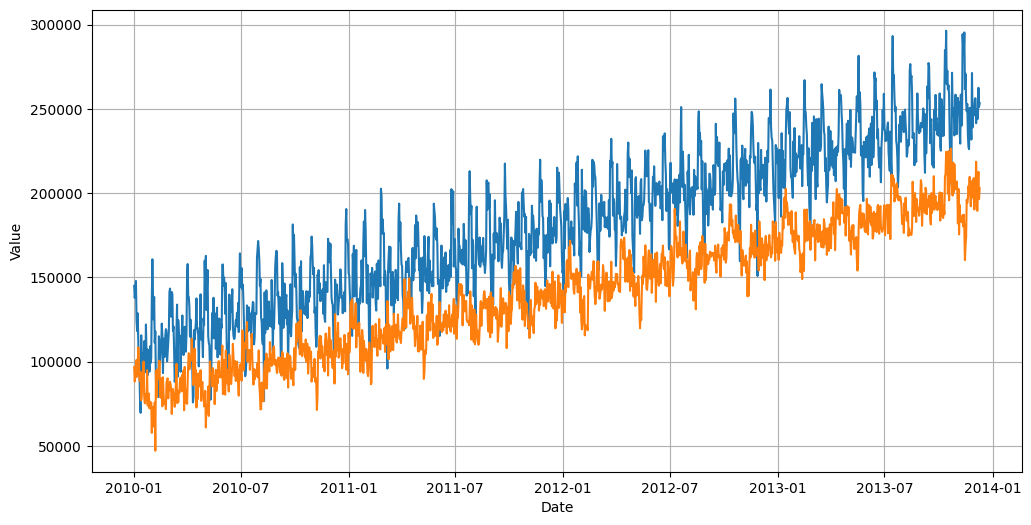

In [453]:
# Plot the synthetic data

plot_series(
    synthetic_data['Date'], 
    [synthetic_data['Total Sales'], synthetic_data['Total Spend']], 
    xlabel="Date", 
    ylabel="Value", 
    # legend=['Total Sales', 'Total Spend']
)

In [456]:
# Save the dataset as csv

synthetic_data.to_csv('../Dataset/dummy_dataset.csv', index=False)

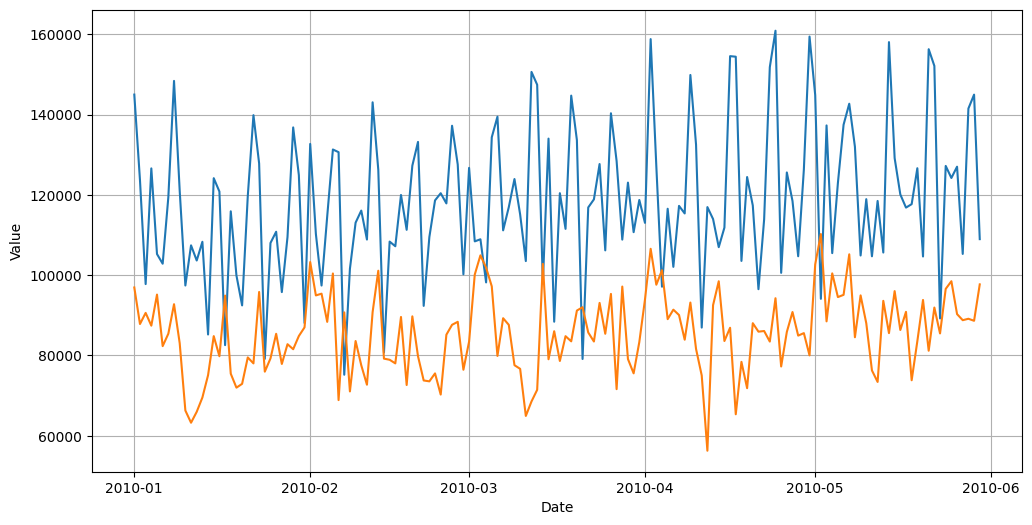

In [460]:
synthetic_data_small = generate_synthetic_data(start_date='2010-01-01', end_date='2010-05-30', period_sales=7, period_spend=30)

# Plot the synthetic data

plot_series(
    synthetic_data_small['Date'], 
    [synthetic_data_small['Total Sales'], synthetic_data_small['Total Spend']], 
    xlabel="Date", 
    ylabel="Value", 
    # legend=['Total Sales', 'Total Spend']
)


synthetic_data.to_csv('../Dataset/dummy_dataset_small.csv', index=False)